In [118]:
%matplotlib inline

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor']='white'
# plt.style.use('bmh')

import geopandas as gpd
import pandas as pd
# import cartopy.crs as ccrs

In [52]:
# Drop columns we don't need:
# Here we will drop the columns that do not serve in our specific analysis.
def remove_zeros(df):
    """" Here we will drop the records of zeroes that do not serve in our specific analysis.
    """
    pud = df[(df['PUD_YR_AVG']>0)]
    return pud

def find_proportion(gdf, column):
    """Here we want to take the sum of the yearly average. and divide each entry by this value. 
    Parameters: gdf = geopandas dataframe
                column = column of interest located within the gdf geopandas dataframe.
    gdf[column + proportion_sum] = a specific gdf column  / sum(gdf with a specific column) 
        """
    gdf[column + 'proportion_sum'] = gdf[column] / np.sum(gdf[column]) 
    assert gdf[column].shape == gdf[column + "proportion_sum"].shape
    return gdf[column + 'proportion_sum']



In [66]:
# def cmap_discretize(cmap, N):
#     """Return a discrete colormap from the continuous colormap cmap.
    
#         cmap: colormap instance, eg. cm.jet. 
#         N: number of colors.
#     """
#     if type(cmap) == str:
#         cmap = matplotlib.cm.get_cmap(cmap)
#     colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
#     colors_rgba = cmap(colors_i)
#     indices = np.linspace(0, 1., N+1)
# #     indices = [0, 0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064]
#     print(indices)
#     cdict = {}
#     for ki, key in enumerate(('red','green','blue')):
#         cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
#     # Return colormap object.
#     print(cdict)
#     return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [147]:
def pudMap(file, column, metadata):
    """ Reads the shape file and from the list of file names selects the specified file to make a plot
        we may also want to apply the normalizing functions we defined earlier where the default is the annual
        average.
    """
    # make a geopandas dataframe. 
    shp = gpd.read_file(file)
#     shp = remove_zeros(shp)
    find_proportion(shp, column)
    
    # Create a figure of the desired size:
    fig = plt.figure(figsize=(7,7))  
    ax = plt.axes()
    ax.grid(False)
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',
        left='off',
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        labelleft='off') # labels along the bottom edge are off

    plt.suptitle(metadata['parkname'], fontsize=16)
    plt.title(metadata['parkvis'], fontsize=14)
    fig.text(.12,.08,metadata['cellsize'], fontsize=12)
    
    # define the bins and normalize
#     bounds = [0.0, 0.01, 0.02, 0.04, 0.08, 1]
#     cmap = plt.cm.BuPu_r
    cmap = plt.cm.viridis
    cmap.set_under(color='dimgray')

    plot = shp.plot(ax=ax, 
                    column = column + 'proportion_sum',
#                     cmap = 'BuPu', 
                    cmap = cmap, 
                    vmin=0.0000001,
                    edgecolor='none',
                    scheme='fisher_jenks',
                    k=7,
                    legend = False)
    
#     plot = shp.plot(ax=ax, column = column + 'proportion_sum',cmap = cmap_discretize('inferno', 10), legend = True)
    return plot

In [101]:
results_dir = '../data/InVEST_OUTPUT/'
list_all_files = os.listdir(results_dir)

In [102]:
list_files = []
for names in list_all_files:
    if names.endswith(".shp"):
        list_files.append(names)

In [104]:
shpname = list_files[0]
shp_path = os.path.join(results_dir, shpname)

In [105]:
metadata = pd.read_csv('../matt/ParkBounds/All_NPS_Park_Bounds_Ranked.csv')

In [107]:
split_name = shpname.split('_')
rank = int(split_name[2])
cellsize = split_name[3]
print(rank)
print(cellsize)

27
879


In [108]:
parkdata = metadata[metadata.Rank == rank]

In [109]:
parkdata

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,Park,Rank,2016_Visit
17,CRLA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Crater Lake National Park,2017/06/05,OR,PW,1163670,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/224...,Crater Lake,Crater Lake NP,27,756344


In [110]:
parkname = parkdata['PARKNAME'].values[0]
parkvis = str(round(parkdata['2016_Visit'].values[0]/1e6, 2)) + ' million visitors'
parkmeta = {'parkname':parkname, 'parkvis':parkvis, 'cellsize':str(cellsize) + ' meter cells'}

In [82]:


# # Create a figure of the desired size:
# fig = plt.figure(figsize=(5,5))  
# ax = plt.axes()
# ax.grid(False)
# plt.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     right='off',
#     left='off',
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off',
#     labelleft='off') # labels along the bottom edge are off

# plt.suptitle(parkname, fontsize=14)
# plt.title(parkvis, fontsize=10)

# # shp.plot(ax=ax, column="PUD_YR_AVG")
# pudMap(shp_path, "PUD_YR_AVG")

256


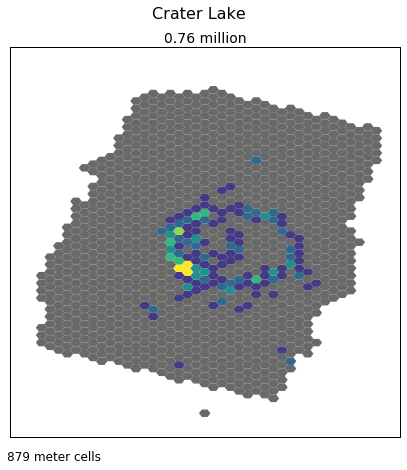

In [148]:
pudMap(shp_path, "PUD_YR_AVG", parkmeta)